In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import sem

In [2]:
clinic_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_drug_df = pd.read_csv("raw_data/mouse_drug_data.csv")

In [3]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinic_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [11]:
volume_merge = pd.merge(mouse_drug_df, clinic_df, on = "Mouse ID")[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
group_volume = volume_merge.groupby(["Drug","Timepoint"]).mean().reset_index()
tumor_response = group_volume.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
tumor_response = tumor_response.reset_index()

#Find standard error, make a df, merge with old one. Feels kinda awkward, but I couldn't find a better example.
response_error = volume_merge.groupby(["Drug","Timepoint"]).sem().reset_index()
response_error = response_error.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
response_error = response_error.reset_index()
response_error.columns = ['Timepoint','Capomulin Error','Ceftamin Error','Infubinol Error','Ketapril Error','Naftisol Error',
 'Placebo Error','Propriva Error','Ramicane Error','Stelasyn Error','Zoniferol Error']


response_df = pd.merge(tumor_response, response_error, on = 'Timepoint')


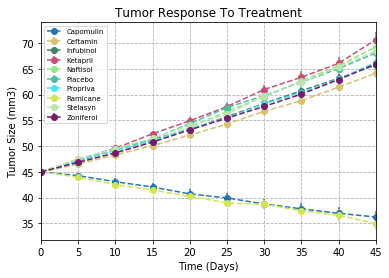

In [13]:
response_df = pd.merge(tumor_response, response_error, on = 'Timepoint')

random.seed(0)
#The +10 is hard coding the number of drugs. Could do num_drugs or something for generality, but I already did it.
ax1 = response_df.plot(kind='line', x='Timepoint', y=response_df.columns[1], yerr=response_df.columns[1+10], linestyle='--', marker='o' )
for j in range(2,len(tumor_response.columns)):
    new_color = (random.random(),random.random(),random.random())
    response_df.plot(kind='line', x='Timepoint',color = new_color, y=response_df.columns[j],yerr=response_df.columns[j+10] , linestyle='--',marker='o' ,ax=ax1 )
plt.title("Tumor Response To Treatment")
plt.grid(linestyle = '--')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Size (mm3)")
#plt.rcParams["figure.figsize"] = (10,10)
plt.legend(loc=2, prop={'size': 7})
plt.show()

## Metastatic Response To Treatment

In [15]:
meta_merge = pd.merge(mouse_drug_df, clinic_df, on = "Mouse ID")[["Drug", "Timepoint", "Metastatic Sites"]]
group_meta = meta_merge.groupby(["Drug","Timepoint"]).mean().reset_index()
meta_response = group_meta.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
meta_response = meta_response.reset_index()

meta_error = meta_merge.groupby(["Drug","Timepoint"]).sem().reset_index()
meta_error = meta_error.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
meta_error = meta_error.reset_index()
meta_error.columns = ['Timepoint','Capomulin Error','Ceftamin Error','Infubinol Error','Ketapril Error','Naftisol Error',
 'Placebo Error','Propriva Error','Ramicane Error','Stelasyn Error','Zoniferol Error']


meta_df = pd.merge(tumor_response, response_error, on = 'Timepoint')

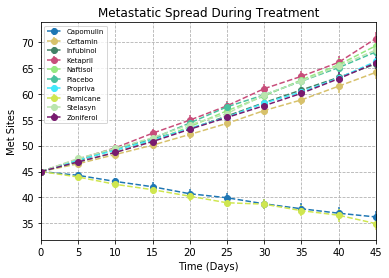

In [16]:
random.seed(0)
ax1 = meta_df.plot(kind='line', x='Timepoint', y=meta_df.columns[1],yerr=meta_df.columns[1+10], linestyle='--', marker='o' )
for j in range(2,len(meta_response.columns)):
    new_color = (random.random(),random.random(),random.random())
    meta_df.plot(kind='line', x='Timepoint',color = new_color, y=meta_df.columns[j],yerr=meta_df.columns[1+10], linestyle='--',marker='o' ,ax=ax1 )
plt.title("Metastatic Spread During Treatment")
plt.grid(linestyle = '--')
plt.xlabel("Time (Days)")
plt.ylabel("Met Sites")
plt.legend(loc=2, prop={'size': 7})
plt.show()

## Survival Rates

In [17]:
clinic_copy = clinic_df.copy()
clinic_copy['Mouse Count'] = 1

survive_merge = pd.merge(mouse_drug_df, clinic_copy, on = "Mouse ID")[["Drug", "Timepoint", "Mouse Count"]]
group_survive = survive_merge.groupby(["Drug","Timepoint"]).count().reset_index()
survive_response = group_survive.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
survive_response = survive_response.reset_index()

for i in range(1,len(survive_response.columns)):
    survive_response.iloc[:,i] = 100*survive_response.iloc[:,i]/survive_response.iloc[0,i]
    


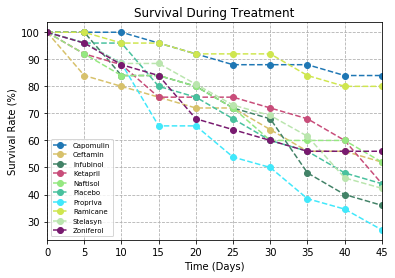

In [18]:
random.seed(0)
ax1 = survive_response.plot(kind='line', x='Timepoint', y=survive_response.columns[1], linestyle='--', marker='o' )
for j in range(2,len(survive_response.columns)):
    new_color = (random.random(),random.random(),random.random())
    survive_response.plot(kind='line', x='Timepoint',color = new_color, y=survive_response.columns[j], linestyle='--',marker='o' ,ax=ax1 )
plt.title("Survival During Treatment")
plt.grid(linestyle = '--')
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc=3, prop={'size': 7})
plt.show()

## Summary Bar Plot

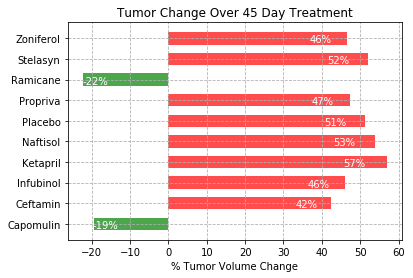

In [19]:
drugs = list(tumor_response.columns)[1:]
tumor_diffs = [100*(tumor_response[drug][9] - tumor_response[drug][0])/tumor_response[drug][0] for drug in drugs]
colors = []
for val in tumor_diffs:
    if val >= 0:
        colors.append('r')
    else:
        colors.append('g')

my_plot = plt.barh(range(len(drugs)), tumor_diffs, 0.6, tick_label = drugs, color = colors, alpha = 0.7 )

for bar in my_plot:
    width = bar.get_width()
    plt.text(0.85 * width, bar.get_y(),str(int(width)) + '%' ,ha='center', va='bottom', color = 'w')

plt.grid(linestyle = '--')
plt.xlabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')
plt.show()


## Observations

### Ramicane and Capomulin are the only two drugs to shrink tumors.
### Ramicane and Capomulin had the lowest spread of metastatic sites.
### Rats on Ramicane and Capomulin had the highest survival rates.

#### It seems that Ramicane and Capomulin are the best performing drugs on all metrics considered here.